In [15]:
# from google.colab import drive
# drive.mount('/content/drive')
!python --version

Python 3.8.18


In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
%time df = pd.read_json("/Users/chalana/Desktop/CW_DL/yelp_academic_dataset_review.json", encoding = 'ISO-8859-1', lines=True, nrows=10000)

CPU times: user 53.4 ms, sys: 23.6 ms, total: 77 ms
Wall time: 103 ms


In [18]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [19]:
df.shape

(10000, 9)

In [20]:
df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [21]:
df.stars.unique()
#How many unique star values are there
df.stars.value_counts()
#shows the distribution for each star value

stars
5    4445
4    2574
3    1139
1    1079
2     763
Name: count, dtype: int64

Text(0.5, 1.0, 'Precentage of Stars rating')

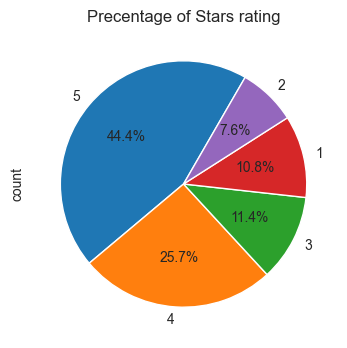

In [22]:
plt.figure(figsize=(4,4))
df["stars"].value_counts().plot.pie(autopct="%1.1f%%", startangle=60)
plt.title("Precentage of Stars rating")

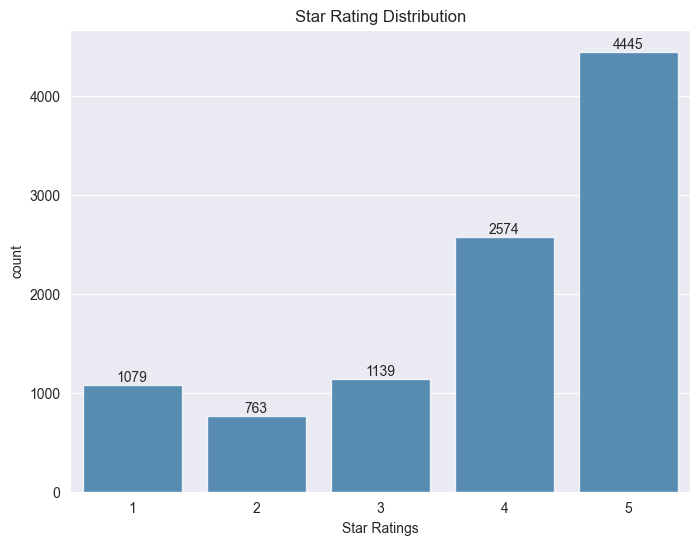

In [23]:
x=df['stars'].value_counts()
x=x.sort_index()
plt.figure(figsize=(8,6))
ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('count')
plt.xlabel('Star Ratings')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [24]:
df["label"] = df["stars"].apply(lambda score: "positive" if score >= 3 else "negative")
df['label'] = df['label'].map({'positive':1, 'negative':0})

In [25]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,label
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,1
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,1
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,1
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,1
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1


In [26]:
new_df= df[['text', 'label']]

In [27]:
new_df

,text,label
0,"If you decide to eat here, just be aware it is...",1
1,I've taken a lot of spin classes over the year...,1
2,Family diner. Had the buffet. Eclectic assortm...,1
3,"Wow! Yummy, different, delicious. Our favo...",1
4,Cute interior and owner (?) gave us tour of up...,1
...,...,...
9995,Excellent food and service. The place is funct...,1
9996,Just about to get tucked into a meatloaf that ...,1
9997,Outstanding customer service! And my car is dr...,1
9998,I and my husband went here for Dinner one day ...,1


In [28]:
!pip install langdetect

In [29]:
from langdetect import detect
#import detect function from langdetect
nonen=new_df[new_df['text'].apply(detect)!='en']
#nonen is the dataframe of non-english user reviews

In [30]:
nonen

,text,label
830,"De vacaciones y sin ganas de cocinar, decidimo...",1
1906,City Parkã®è¿ãã«ããæ¿å®ããæ°·å±ã...,1
3369,Op suggestie van yelp- hier geweest op onze ee...,1
4281,Excelente comida mediterrÃ¡nea! El gyro es bue...,1
5717,Peter piper on roids. Good pizza,1
6349,Excelente la comida. Las costillas (ribs) fue...,1
7748,Small quiet little place but didn't feel cramp...,1
8623,Sehr nettes kleines ruhiges typisches amerikan...,1
9237,ç¹äºåä¸ªè æ²¡ä¸ä¸ªå¥½åç ä¸éåä¸...,0
9933,BBQ good lawd have mercy !,1


In [31]:
yelp=new_df[new_df['text'].apply(detect)=='en']
#yelp is the data frame we will continue to work on.
#yelp only contains English reviews

In [32]:
yelp

,text,label
0,"If you decide to eat here, just be aware it is...",1
1,I've taken a lot of spin classes over the year...,1
2,Family diner. Had the buffet. Eclectic assortm...,1
3,"Wow! Yummy, different, delicious. Our favo...",1
4,Cute interior and owner (?) gave us tour of up...,1
...,...,...
9995,Excellent food and service. The place is funct...,1
9996,Just about to get tucked into a meatloaf that ...,1
9997,Outstanding customer service! And my car is dr...,1
9998,I and my husband went here for Dinner one day ...,1


In [33]:
yelp['text']=yelp['text'].str.lower()
#change all strings to be lower
yelp['text']=yelp['text'].str.replace('[^\w\s]','')
#get rid of unwanted characters such as punctuation marks
yelp['text']=yelp['text'].str.replace('\d+','')
#removing numerals
yelp['text']=yelp['text'].str.replace('\n',' ').str.replace('\r','')

/var/folders/2j/yxv84ths1v900tnt142h8nh80000gn/T/ipykernel_40598/549424886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['text']=yelp['text'].str.lower()
/var/folders/2j/yxv84ths1v900tnt142h8nh80000gn/T/ipykernel_40598/549424886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['text']=yelp['text'].str.replace('[^\w\s]','')
/var/folders/2j/yxv84ths1v900tnt142h8nh80000gn/T/ipykernel_40598/549424886.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [34]:
yelp

,text,label
0,"if you decide to eat here, just be aware it is...",1
1,i've taken a lot of spin classes over the year...,1
2,family diner. had the buffet. eclectic assortm...,1
3,"wow! yummy, different, delicious. our favo...",1
4,cute interior and owner (?) gave us tour of up...,1
...,...,...
9995,excellent food and service. the place is funct...,1
9996,just about to get tucked into a meatloaf that ...,1
9997,outstanding customer service! and my car is dr...,1
9998,i and my husband went here for dinner one day ...,1


In [35]:
yelp.label.value_counts()

label
1    8149
0    1840
Name: count, dtype: int64

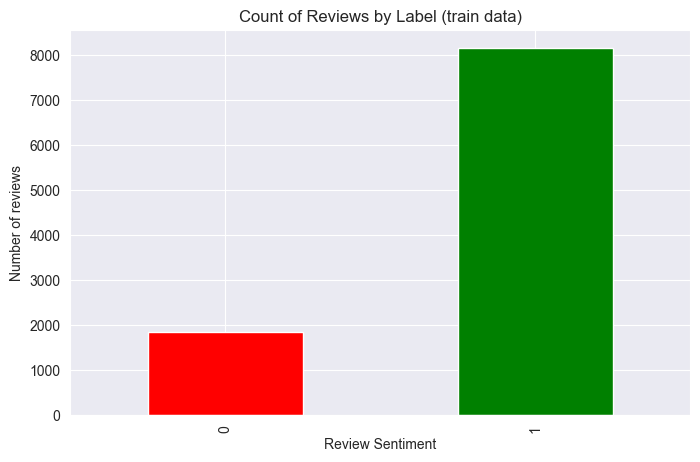

In [36]:
ax = yelp['label'].value_counts().sort_index() \
     .plot (kind='bar',
     title='Count of Reviews by Label (train data)',
     figsize=(8, 5), color = ['red', 'green'])

ax.set_xlabel('Review Sentiment')
ax.set_ylabel ('Number of reviews')
plt.show()

In [37]:
!pip install transformers

In [38]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd

In [39]:
# Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(yelp['text'], yelp['label'], test_size=0.2, random_state=42)

In [40]:
# Load pre-trained DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [41]:
# Tokenize the input texts
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True)

In [42]:
# Create PyTorch datasets
train_dataset = TensorDataset(torch.tensor(train_encodings['input_ids']),
                              torch.tensor(train_encodings['attention_mask']),
                              torch.tensor(train_labels.tolist()))
test_dataset = TensorDataset(torch.tensor(test_encodings['input_ids']),
                             torch.tensor(test_encodings['attention_mask']),
                             torch.tensor(test_labels.tolist()))


In [43]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [44]:
# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [45]:
# Training parameters
epochs = 3
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

In [ ]:
train_losses = []

# Training loop
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()


    # Calculate average training loss for the epoch
    avg_epoch_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_epoch_loss)
    print(f'Epoch {epoch + 1}/{epochs}, Training Loss: {avg_epoch_loss:.4f}')

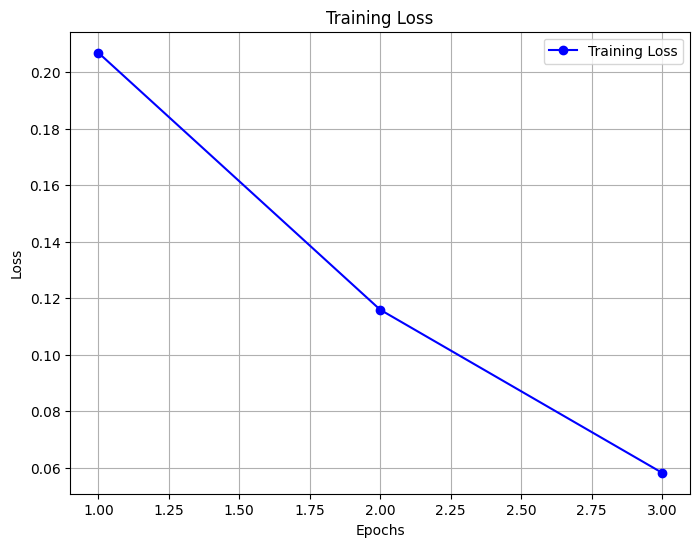

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the training loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), train_losses, marker='o', color='b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluation
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


In [ ]:
# Calculate confusion matrix
confusion = confusion_matrix(true_labels, predictions)
print(f'Confusion Matrix:\n{confusion}')

Confusion Matrix:
[[ 325   40]
 [ 113 1521]]


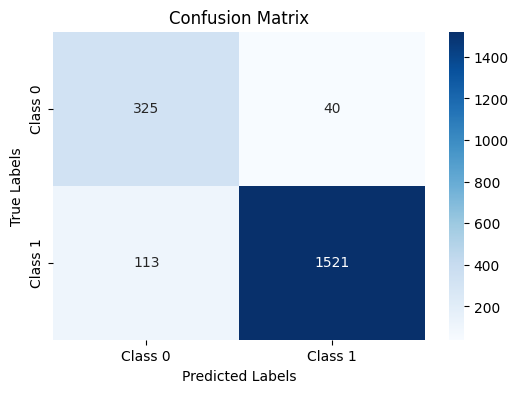

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
confusion = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate classification report
class_report = classification_report(true_labels, predictions, target_names=['Class 0', 'Class 1'])
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.74      0.89      0.81       365
     Class 1       0.97      0.93      0.95      1634

    accuracy                           0.92      1999
   macro avg       0.86      0.91      0.88      1999
weighted avg       0.93      0.92      0.93      1999


In [ ]:
# Save the model to a directory
model.save_pretrained('/content/mod')
tokenizer.save_pretrained('/content/tok')

print("Model and tokenizer saved successfully.")

Model and tokenizer saved successfully.


In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Load the saved tokenizer and model from the directory
tokenizer = DistilBertTokenizer.from_pretrained('/content/tok')
model = DistilBertForSequenceClassification.from_pretrained('/content/mod')

# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def predict_sentiment(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    # Get model prediction
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    # Get predicted class
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()

    return predicted_class

# Example usage
text_example = "foods are not good, i hate this restuarant!"
predicted_sentiment = predict_sentiment(text_example)
if predicted_sentiment == 0:
    print("Negative sentiment")
elif predicted_sentiment == 1:
    print("Positive sentiment")


Negative sentiment
